# Projeto-4

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


### Leitura do arquivo e tratamento dos dados

In [18]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()
#teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [20]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO,MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004,5
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004,5
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004,5
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004,5
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004,5


In [33]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)


In [34]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

### Objetivos!!

- Aumento bruto e percentual de cada combustivel em todo período. - FEITO!
- Evolução do preço médio dos combustíveis por região. - FEITO!

- Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois. A FAZER

- Procurar outliers - EM ANDAMENTO!

- Plotar um gráfico com a média da quantidade de postos por estado em 2004 x a quantidade média de postos por estado em 2021. - FEITO!

- Mapa de calor com valor médio de cada estado.- EM ANDAMENTO
- Mapa de calor com quantidade de postos por estado.- EM ANDAMENTO

- Observações:
- Há valores com -9999, devemos substituir por NaN?
- Gasolina Aditivada só temos valores entre 20-21, base de dados muito pequena em relação aos outros!

### - Evolução do preço médio dos combustíveis por região.

In [7]:
df_gas['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

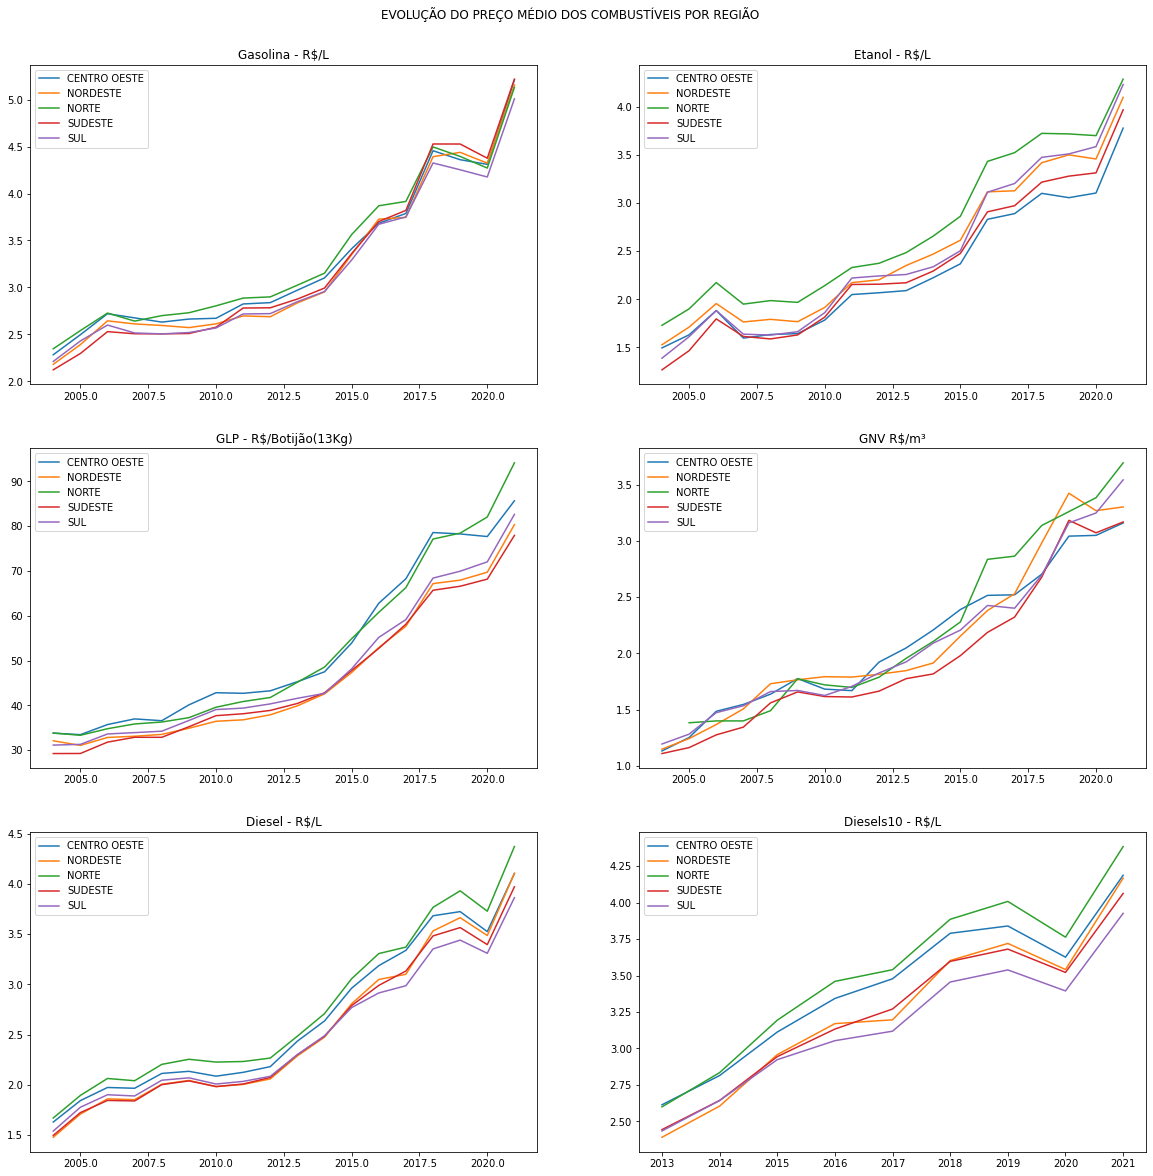

In [145]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('EVOLUÇÃO DO PREÇO MÉDIO DOS COMBUSTÍVEIS POR REGIÃO', fontsize=12, y=0.92)

df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

axs[0,0].plot(df_gasolina)
axs[0,1].plot(df_etanol)
axs[1,0].plot(df_glp)
axs[1,1].plot(df_gnv)
axs[2,0].plot(df_diesel)
axs[2,1].plot(df_diesels10)

axs[0,0].set_title('Gasolina - R$/L')
axs[0,1].set_title('Etanol - R$/L')
axs[1,0].set_title('GLP - R$/Botijão(13Kg)')
axs[1,1].set_title('GNV R$/m³')
axs[2,0].set_title('Diesel - R$/L')
axs[2,1].set_title('Diesels10 - R$/L')

axs[0,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[0,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left');

- Comentários:

- O Norte tem majoritariamente o maior preço dos diesels(comum e 10s) e do etanol e também do GNV a partir de 2015, do GLP a partir de 2018 e da gasolina entre 2008 e 2017. Com certeza é pior região em relação a preço.
- 

### Aumento percentual de cada combustivel em todo período.

In [125]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_bruto_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())/df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())*100
aumento_bruto_produto = aumento_bruto_produto.to_frame()
aumento_bruto_produto.reset_index(inplace=True)
aumento_bruto_produto.drop(labels = [1,6],axis=0, inplace=True)

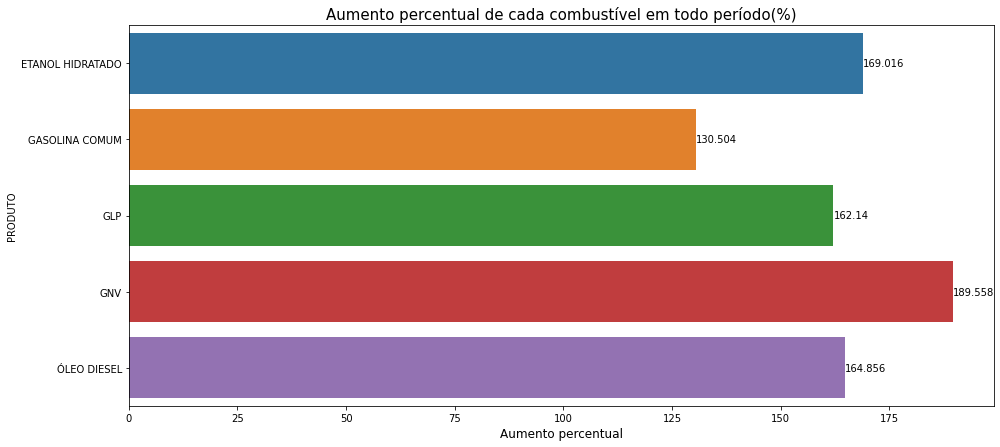

In [143]:
plt.figure(figsize=(15.5,7))
plt.title('Aumento percentual de cada combustível em todo período(%)', size=15)
grafico_aumento_percentual = sns.barplot(data=aumento_bruto_produto, x='PREÇO MÉDIO REVENDA', y='PRODUTO')
grafico_aumento_percentual.set_xlabel("Aumento percentual", size = 12 ) 
grafico_aumento_percentual.bar_label(grafico_aumento_percentual.containers[0]);

### Plotar um gráfico com a média da quantidade de postos por estado em 2004 x a quantidade média de postos por estado em 2021

In [115]:
df_postos_2004 = df_gas.loc[df_gas['ANO']==2004]
df_postos_2004 = df_postos_2004.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='sum')
df_postos_2004 = df_postos_2004.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2004.reset_index(inplace = True)


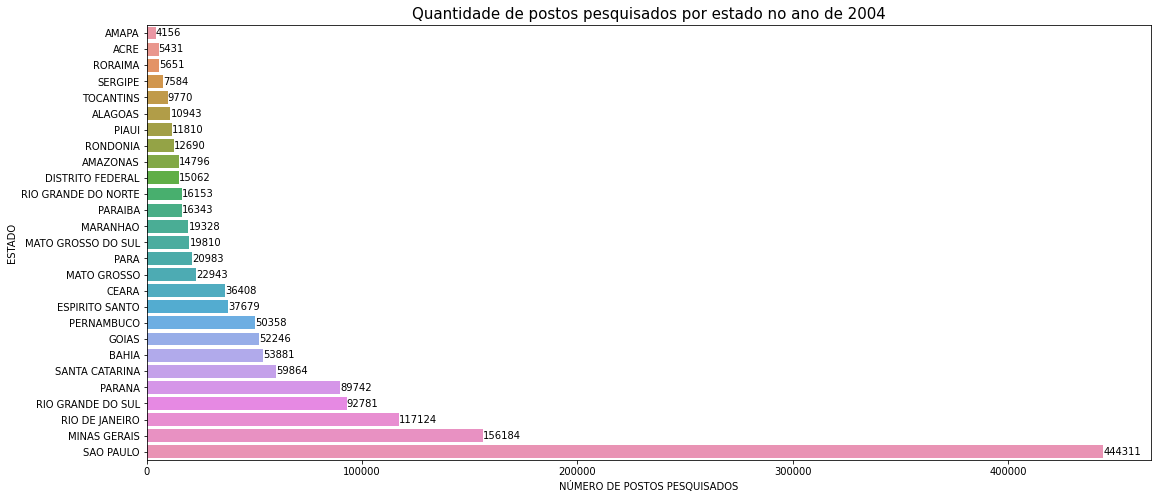

In [116]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2004', size=15)
grafico_postos_2004 = sns.barplot(data = df_postos_2004, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2004.bar_label(grafico_postos_2004.containers[0]);

In [117]:
df_postos_2021 = df_gas.loc[df_gas['ANO']==2021]
df_postos_2021 = df_postos_2021.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='sum')
df_postos_2021 = df_postos_2021.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2021.reset_index(inplace = True)

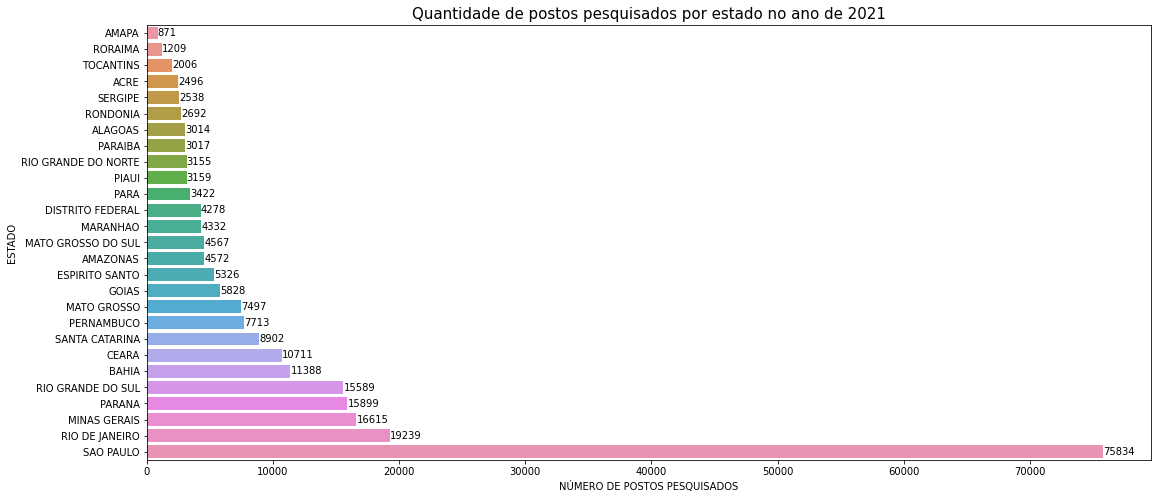

In [118]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2021', size=15)
grafico_postos_2021 = sns.barplot(data = df_postos_2021, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2021.bar_label(grafico_postos_2021.containers[0]);

### standby

In [146]:
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO,MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004,5
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004,5
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004,5
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004,5
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004,5


In [149]:
df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='ESTADO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

In [153]:
df_gasolina_shift = df_gasolina.shift(1)
df_etanol_shift = df_etanol.shift(1)
df_glp_shift = df_glp.shift(1)
df_gnv_shift = df_gnv.shift(1)
df_diesel_shift = df_diesel.shift(1)
df_diesels10_shift = df_diesels10.shift(1)

In [155]:
df_gasolina_var = (df_gasolina - df_gasolina_shift)/df_gasolina_shift
df_etanol_var = (df_etanol - df_etanol_shift)/df_etanol_shift
df_glp_var = (df_glp - df_glp_shift)/df_glp_shift
df_gnv_var = (df_gnv - df_gnv_shift)/df_gnv_shift
df_diesel_var = (df_diesel - df_diesel_shift)/df_diesel_shift
df_diesels10_var = (df_diesels10 - df_diesels10_shift)/df_diesels10_shift


In [156]:
df_gasolina_var.head()

ESTADO,ACRE,ALAGOAS,AMAPA,AMAZONAS,BAHIA,CEARA,DISTRITO FEDERAL,ESPIRITO SANTO,GOIAS,MARANHAO,...,PIAUI,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDONIA,RORAIMA,SANTA CATARINA,SAO PAULO,SERGIPE,TOCANTINS
ANO,,,,,,,,,,,,,,,,,,,,,
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,0.052036,0.146543,0.030698,0.144737,0.070442,0.070573,0.096886,0.090039,0.093135,0.081059,...,0.090213,0.076728,0.094505,0.123069,0.048317,0.194458,0.093003,0.092788,0.097752,0.103547
2006,0.106945,0.096952,0.051789,-0.002498,0.112705,0.105118,0.115709,0.112818,0.095234,0.163917,...,0.034850,0.095261,0.123373,0.058716,0.062008,0.116344,0.060808,0.094419,0.096711,0.098444
2007,-0.008477,0.000823,-0.056775,-0.038375,-0.011697,-0.032465,-0.009163,-0.001003,-0.021086,-0.003451,...,0.017879,-0.011435,-0.030298,-0.058432,-0.018640,-0.078417,-0.012276,-0.011784,-0.011991,-0.008842
2008,0.015827,-0.015788,0.071381,-0.009647,0.001354,-0.014770,-0.006967,0.001430,-0.006852,-0.027841,...,0.015799,0.005787,0.016427,0.001012,0.010555,0.021603,-0.002368,-0.004779,0.001375,0.004337


### Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois. A FAZER